# Binomial Distribution - Python Implementation

This notebook demonstrates the implementation and applications of the binomial distribution using Python.


## 1. Basic Implementation


In [1]:
import math

def binomial_pmf(n, k, p):
    """Calculate binomial probability mass function"""
    if k > n or k < 0:
        return 0
    coefficient = math.comb(n, k)
    return coefficient * (p**k) * ((1-p)**(n-k))

def binomial_cdf(n, k, p):
    """Calculate binomial cumulative distribution function"""
    return sum(binomial_pmf(n, i, p) for i in range(k+1))

# Example: 10 coin flips, probability of getting exactly 7 heads
n, k, p = 10, 7, 0.5
probability = binomial_pmf(n, k, p)
print(f"P(X = {k}) = {probability:.4f}")


P(X = 7) = 0.1172


## 2. Distribution Example


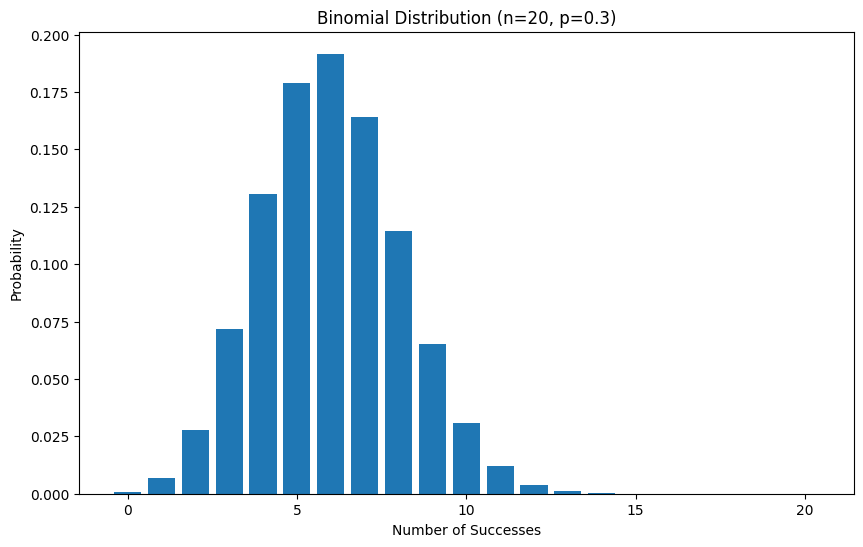

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Parameters
n, p = 20, 0.3

# Generate random samples
samples = np.random.binomial(n, p, 100)

# Calculate probabilities
k_values = range(n+1)
probabilities = [stats.binom.pmf(k, n, p) for k in k_values]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(k_values, probabilities)
plt.title(f'Binomial Distribution (n={n}, p={p})')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.show()


## 3. Key Python Packages

### 3.1 SciPy Stats


In [3]:
from scipy import stats

# Example usage
n, p = 10, 0.3
k = 3

print("SciPy Stats Functions:")
print(f"PMF: {stats.binom.pmf(k, n, p):.4f}")    # Probability Mass Function
print(f"CDF: {stats.binom.cdf(k, n, p):.4f}")    # Cumulative Distribution Function
print(f"PPF (0.5): {stats.binom.ppf(0.5, n, p):.1f}")    # Quantile function (median)

# Random samples
samples = stats.binom.rvs(n, p, size=5)
print(f"Random samples: {samples}")


SciPy Stats Functions:
PMF: 0.2668
CDF: 0.6496
PPF (0.5): 3.0
Random samples: [2 3 5 2 2]


### 3.2 NumPy


In [4]:
import numpy as np

# Random sampling
n, p = 20, 0.4
samples = np.random.binomial(n, p, size=10)
print(f"NumPy random samples: {samples}")
print(f"Mean of samples: {np.mean(samples):.2f}")
print(f"Expected mean: {n * p:.2f}")


NumPy random samples: [ 7  8  8  4  8  9 10  9  7  9]
Mean of samples: 7.90
Expected mean: 8.00


### 3.3 Statsmodels


In [5]:
from statsmodels.stats.proportion import proportions_ztest

# Hypothesis testing for proportions
count = np.array([50, 65])  # Number of successes
nobs = np.array([1000, 1000])  # Number of observations

stat, p_value = proportions_ztest(count, nobs)
print(f"Z-statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject null hypothesis - proportions are significantly different")
else:
    print("Fail to reject null hypothesis - no significant difference")


Z-statistic: -1.4408
P-value: 0.1496
Fail to reject null hypothesis - no significant difference


## 4. Data Science Applications

### 4.1 A/B Testing


In [6]:
from scipy import stats

# Example: Website conversion rate testing
# Control group: 1000 visitors, 50 conversions
# Treatment group: 1000 visitors, 65 conversions

n_control, success_control = 1000, 50
n_treatment, success_treatment = 1000, 65

# Calculate conversion rates
p_control = success_control / n_control
p_treatment = success_treatment / n_treatment

print(f"Control conversion rate: {p_control:.3f}")
print(f"Treatment conversion rate: {p_treatment:.3f}")

# Statistical test
p_value = stats.binomtest(success_treatment, n_treatment, p_control, 'two-sided').pvalue
print(f"\nP-value (two-sided): {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference detected")
else:
    print("No significant difference")

# One-sided test for improvement
p_value_greater = stats.binomtest(success_treatment, n_treatment, p_control, 'greater').pvalue
print(f"\nP-value (greater): {p_value_greater:.4f}")

if p_value_greater < 0.05:
    print("Significant improvement detected")
else:
    print("No significant improvement")


Control conversion rate: 0.050
Treatment conversion rate: 0.065

P-value (two-sided): 0.0350
Significant difference detected

P-value (greater): 0.0207
Significant improvement detected


### 4.2 Quality Control


In [7]:
# Example: Manufacturing defect rate
# Sample 100 items, expected defect rate 5%

n, p = 100, 0.05

# Probability of finding exactly 3 defects
prob_3_defects = stats.binom.pmf(3, n, p)
print(f"P(3 defects) = {prob_3_defects:.4f}")

# Probability of finding 3 or fewer defects
prob_3_or_fewer = stats.binom.cdf(3, n, p)
print(f"P(≤3 defects) = {prob_3_or_fewer:.4f}")

# 95% confidence interval
ci_lower = stats.binom.ppf(0.025, n, p)
ci_upper = stats.binom.ppf(0.975, n, p)
print(f"95% CI: [{ci_lower:.1f}, {ci_upper:.1f}]")


P(3 defects) = 0.1396
P(≤3 defects) = 0.2578
95% CI: [1.0, 10.0]


### 4.3 Survey Analysis


In [8]:
# Example: Political poll
# 500 voters, 60% support candidate A

n, p = 500, 0.6

# Probability of getting exactly 300 supporters
prob_300 = stats.binom.pmf(300, n, p)
print(f"P(300 supporters) = {prob_300:.4f}")

# Probability of getting 280-320 supporters
prob_range = stats.binom.cdf(320, n, p) - stats.binom.cdf(279, n, p)
print(f"P(280-320 supporters) = {prob_range:.4f}")

# Expected value and standard deviation
mean = n * p
std = np.sqrt(n * p * (1-p))
print(f"Expected: {mean:.1f} ± {std:.1f}")


P(300 supporters) = 0.0364
P(280-320 supporters) = 0.9388
Expected: 300.0 ± 11.0
